In [5]:
import numpy as np
import pandas as pd
from scipy import stats

# Q1) Problem statement

A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.






>Let s1=cutlet from unit 1
    s2=cutlet from unit 2
    
    
    
> `Null Hypothesis==> Ho= s2-s1=0`

> `Alternate Hypothesis==> H1= s2-s1 != 0`

In [2]:
cutlet_df= pd.read_csv('Cutlets.csv')
cutlet_df.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [4]:
cutlet_df.mean()

Unit A    7.019091
Unit B    6.964297
dtype: float64

In [9]:
A = pd.Series(cutlet_df.iloc[:,0])
B = pd.Series(cutlet_df.iloc[:,1])


In [25]:
#conducting Ttest
p_value=stats.ttest_ind(A,B)
p_value

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

In [26]:
p_value[1]

0.4722394724599501

`ANSWER=>`
- <font color = 'blue'>So comparing p value with alpha(0.05),p is greter than alpha so we accept the null Hypothesis,SO there is no significant difference in the diameter of the cutlet between two units, that is ==> `s2-s1=0`</font>

# Q2 ) Problem Statement

   A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
  Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

Lets consider:
- H0 = that there is no difference between the average TAT.(i.e Variance of all 4 laboratories are the same)
- H1 = that there is difference between the average TAT.(i.e Variance of all 4 laboratories are not the same)

In [15]:
#loading the data
tat_data =pd.read_csv('LabTAT.csv')
tat_data.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [16]:
tat_data.mean()

Laboratory 1    178.361583
Laboratory 2    178.902917
Laboratory 3    199.913250
Laboratory 4    163.682750
dtype: float64

In [23]:
tat_data.var()

Laboratory 1    173.543568
Laboratory 2    223.715251
Laboratory 3    273.539607
Laboratory 4    227.559632
dtype: float64

In [19]:
# conducting one way anova test
p_value=stats.f_oneway(tat_data.iloc[:,0],tat_data.iloc[:,1],tat_data.iloc[:,2],tat_data.iloc[:,3])
p_value

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

In [20]:
p_value[1]

2.1156708949992414e-57

`ANSWER=>`
- <font color = 'blue'>So comparing p value with alpha(0.05),p is less than alpha so we reject the null Hypothesis,SO there there is difference between the average TAT.(i.e Variance of all 4 laboratories are not the same).</font>

# Q3) Problem Statement
**Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.**
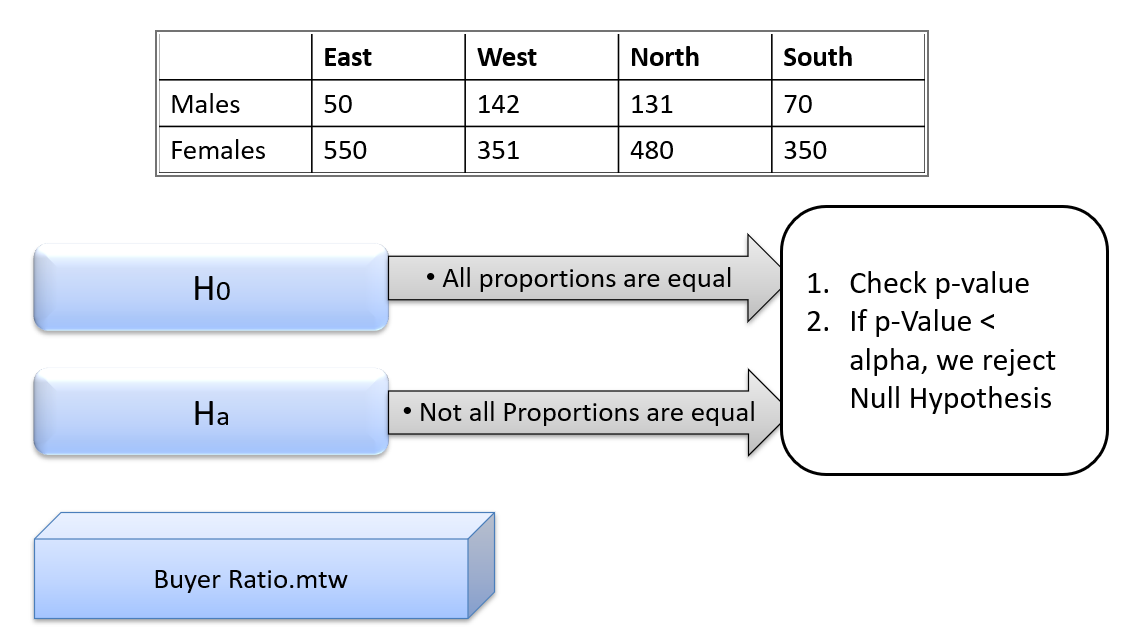

- H0 == The male-female buyer rations are similar across regions.
- H1 == The male-female buyer rations are not similar across regions.

In [27]:
ratio_data = pd.read_csv('BuyerRatio.csv')
ratio_data

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [29]:
#Since there are more than 2 variable we will perform Chi-Square test
p_value=stats.chi2_contingency([ratio_data["East"], ratio_data["West"], ratio_data["North"], ratio_data["South"]])
p_value

(1.5959455386610577,
 0.6603094907091882,
 3,
 array([[  42.76531299,  442.23468701],
        [ 146.81287862, 1518.18712138],
        [ 131.11756787, 1355.88243213],
        [  72.30424052,  747.69575948]]))

In [30]:
p_value[1]

0.6603094907091882

`ANSWER=>`
- <font color = 'blue'>So comparing p value with alpha(0.05),p is greter than alpha so we accept the null Hypothesis,SO `The male-female buyer rations are similar across regions.`</font>

# Q4) Problem Statement
TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences

Lets consider:
- H0 = That defective forms % does not varies by centre.


- H1 = That defective forms % does  varies by centre.

In [31]:
#loading the data
telecall_data = pd.read_csv("Costomer+OrderForm.csv")
telecall_data

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [34]:
telecall_data['Phillippines'].value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [35]:
telecall_data['Indonesia'].value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [36]:
telecall_data['Malta'].value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [37]:
telecall_data['India'].value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

In [40]:
#Since there are more than 2 variable we will perform Chi-Square test
p_value=stats.chi2_contingency([telecall_data['Phillippines'].value_counts(), telecall_data['Indonesia'].value_counts(), telecall_data['Malta'].value_counts(), telecall_data['India'].value_counts()])
p_value

(3.8589606858203545,
 0.2771020991233144,
 3,
 array([[271.75,  28.25],
        [271.75,  28.25],
        [271.75,  28.25],
        [271.75,  28.25]]))

In [41]:
p_value[1]

0.2771020991233144

`ANSWER=>`
- <font color = 'blue'>So comparing p value with alpha(0.05),p is greter than alpha so we accept the null Hypothesis,SO `The defective % does not varies significantly by centres`</font>